# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
# Difference in stockprice 
df['Diff']=df['Adj Close'].diff().shift(-1)

# Target up or down 
df['Target']=np.sign(df['Diff'])

# Opton Premium 
df['Premium']=.08*df['Adj Close']

In [4]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [7]:
y = df.loc[:"2023-09-30","Target"].copy()
df=df.loc[:"2023-09-30",:].copy()

In [8]:
Logreg=LogisticRegression()

Logreg.fit(X, y)
y_pred=Logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [9]:
df['Predictions']=y_pred

In [10]:
df['Profits']=0.

#True Positives 
df.loc[(df['Predictions']==1) & (df['Target']==1),'Profits']=df.loc[(df['Predictions']==1) & (df['Target']==1),'Premium']

#False Positives
df.loc[(df['Predictions']==1) & (df['Target']==-1),'Profits']=100*df.loc[(df['Predictions']==1) & (df['Target']==-1),'Diff']

# 5.) Plot profits over time

<function matplotlib.pyplot.show(close=None, block=None)>

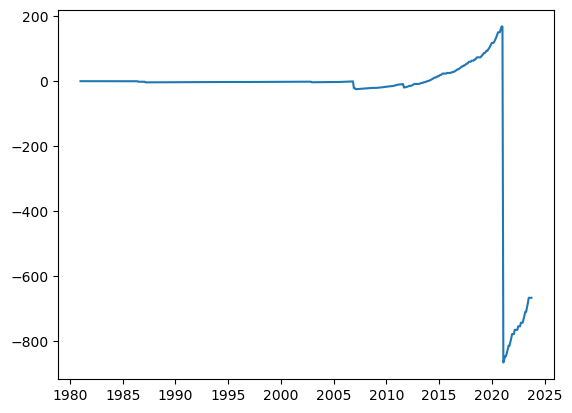

In [11]:
plt.plot(np.cumsum(df['Profits']))
plt.show

In [12]:
#5.5) Your skills from the MQE and how they can help Mr. Lius Ventures. 

I think I can run some tools that I'll put together and eventually learn frm my machine learning and ifnance classes to put together analysis on sentiment as well as ways to find the most efficient investment into each group in terms of future probable growth. 

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.